# <center> Titanic_Train </center>

## 1. 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
titanic = pd.read_csv("titanic.csv")

## 2. 데이터 모양 확인

In [2]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. 데이터 타입 확인

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic['Survived'] = titanic['Survived'].astype(object)
titanic['Pclass'] = titanic['Pclass'].astype(object)

# 범주형 변수로 변환 

## 4. NULL 값을 확인

In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
missing_df = titanic.isnull().sum().reset_index()
missing_df.columns = ['column', 'count']
missing_df['ratio'] = missing_df['count'] / titanic.shape[0]
missing_df.loc[missing_df['ratio'] != 0]


# 전체의 몇 %가 결측값인지 확인 가능

,column,count,ratio
10,Cabin,687,0.771044
11,Embarked,2,0.002245


## 5. 종속변수의 분포를 확인

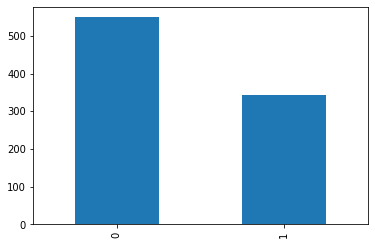

In [7]:
titanic['Survived'].value_counts().plot(kind='bar') 
plt.show()

## 6. 독립변수(범주형) 분포 확인

In [8]:
category_feature = [ col for col in titanic.columns if titanic[col].dtypes == "object"]
# 범주형(object) 타입을 가진 칼럼만 뽑아서 범주형 변수 리스트 생성

category_feature = list(set(category_feature) - set(['PassengerId','Survived']))
# 기본키(Passengerid)와 종속변수로 사용할 Survived 제외
category_feature


['Ticket', 'Sex', 'Name', 'Embarked', 'Pclass', 'Cabin']

### 6.1 단변량 분석

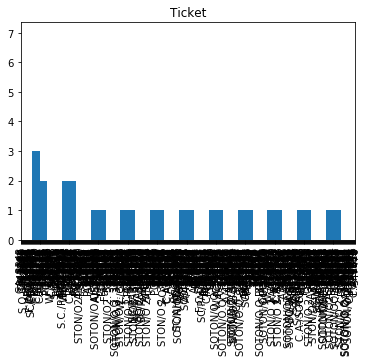

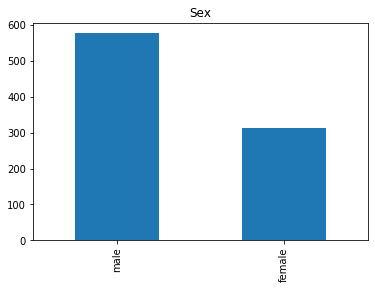

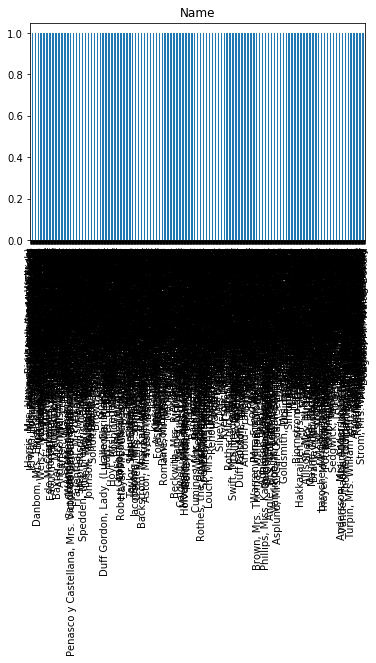

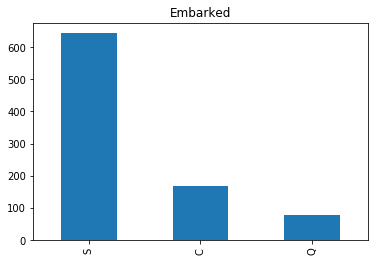

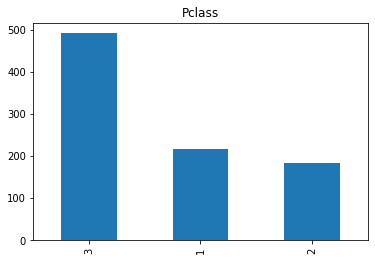

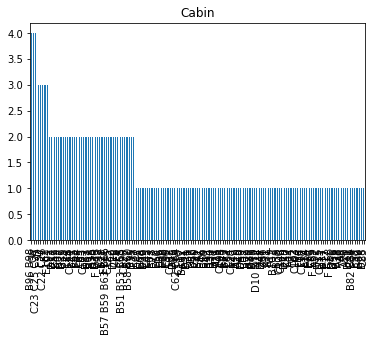

In [9]:
for col in category_feature: 
    titanic[col].value_counts().plot(kind='bar') 
    plt.title(col) 
    plt.show()


# 분포를 살펴봄으로써 카테고리 수가 너무 많고 종속 변수와 관련성이 떨어져보이는 독립변수들은 빼고 분석해볼 수 있음.

### 6.2 이변량 or 다변량 분석

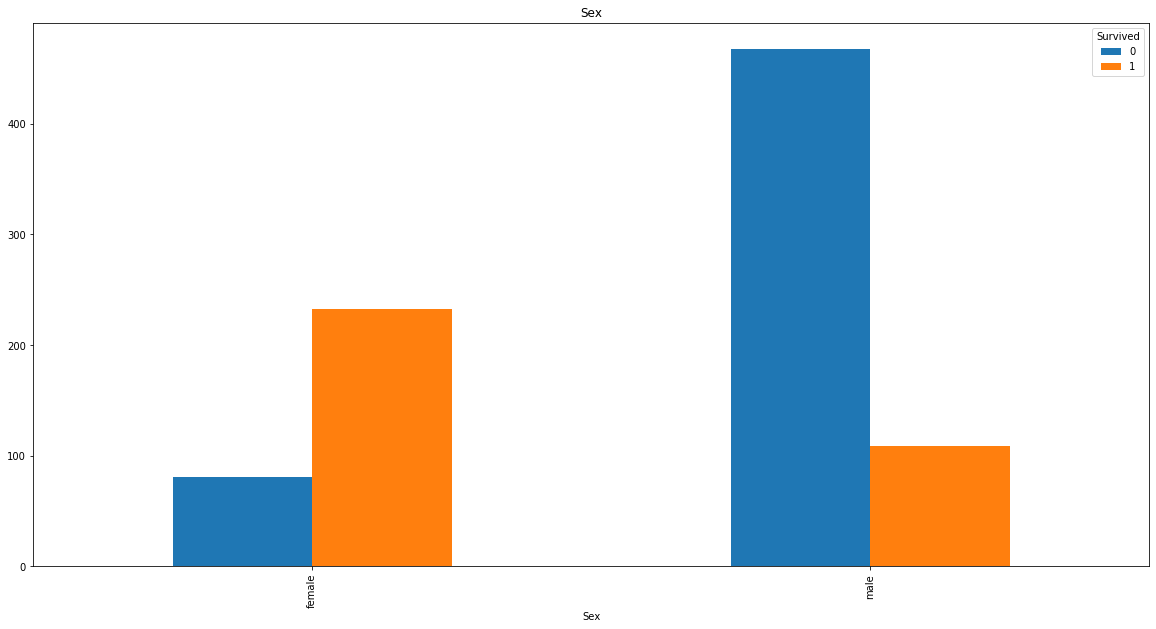

In [10]:
sex_df = titanic.groupby(['Sex','Survived'])['Survived'].count().unstack('Survived')
sex_df.plot(kind='bar', figsize=(20,10))
plt.title('Sex')
plt.show()

# 성별-생존 관계 파악
# 이처럼 두 변수의 관계를 파악하기 위해서 이처럼 확인할 수 있음


## 7. 독립변수(수치형) 분포 확인

In [11]:
numerical_feature = list(set(titanic.columns) - set(category_feature) - set(['PassengerId','Survived','Parch','SibSp']))
numerical_feature = np.sort(numerical_feature)
numerical_feature


array(['Age', 'Fare'], dtype='<U4')

### 7.1 단변량 분석

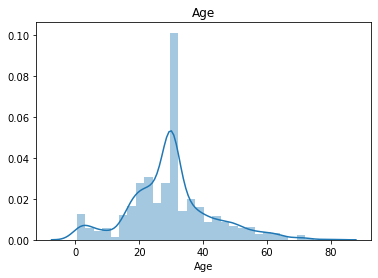

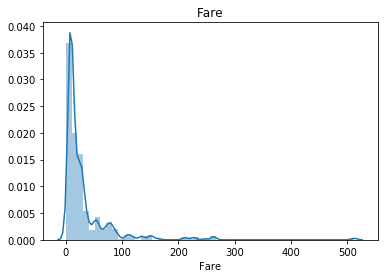

In [12]:
for col in numerical_feature:
    sns.distplot(titanic.loc[titanic[col].notnull(), col])
    plt.title(col)
    plt.show()

### 7.2 이변량 or 다변량 분석

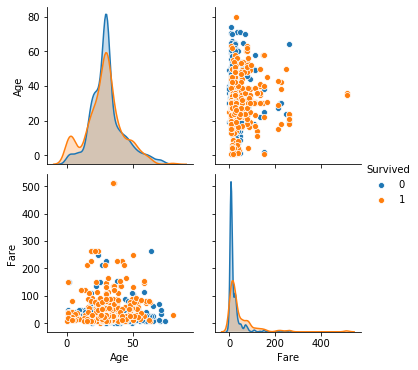

In [13]:
sns.pairplot(titanic[list(numerical_feature) + ['Survived']], hue='Survived', 
             x_vars=numerical_feature, y_vars=numerical_feature)
plt.show()

# pairpolot을 통해 여러 변수의 관계를 한 번에 파악할 수 있음
# hue 파라미터를 통해 종속 변수 지정함으로써 세 변수 관계 파악 가능

## 8. 범주, 수치형 변수 간 관계 확인

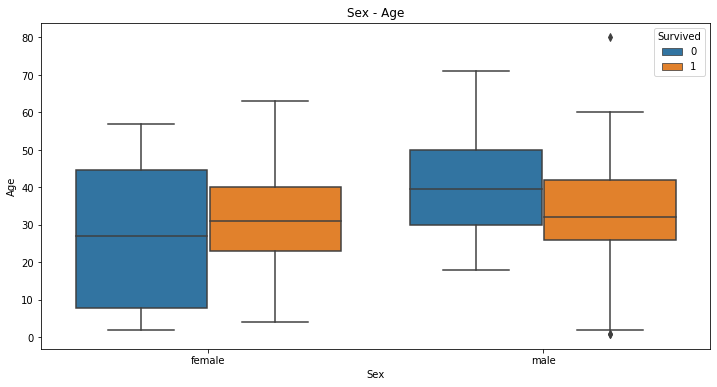

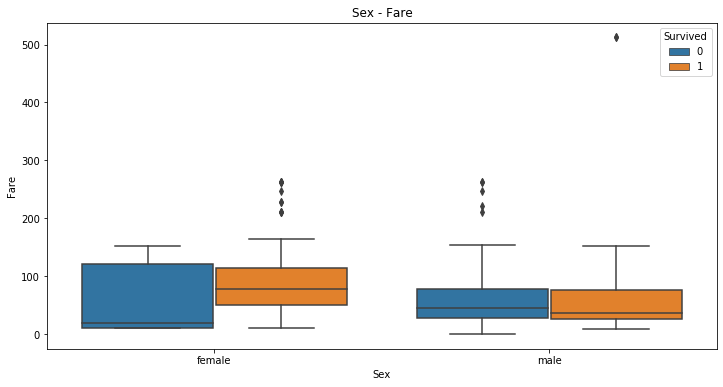

In [14]:
unique_list = titanic['Sex'].unique()
 
for col in numerical_feature:
    plt.figure(figsize=(12,6))
    sns.boxplot(x='Sex', y=col, hue='Survived', data=titanic.dropna())
    plt.title("Sex - {}".format(col))
    plt.show()


### 9. 생존 여부 분류 모델 만들어 보기(Logistic)

In [15]:
titanic_log = titanic

# 문자열 숫자로 변환
titanic_log['Sex'] = titanic_log['Sex'].map({'female':1,'male':0})

# feature 분리

titanic_log['FirstClass'] = titanic_log['Pclass'].apply(lambda x: 1 if x == 1 else 0)
titanic_log['SecondClass'] = titanic_log['Pclass'].apply(lambda x: 1 if x == 2 else 0)
titanic_log['ThirdClass'] = titanic_log['Pclass'].apply(lambda x: 1 if x == 3 else 0)

In [16]:
titanic_log.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstClass,SecondClass,ThirdClass
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0,1


In [17]:
# 모델에 사용할 데이터 세트 준비
features = titanic_log[['Sex', 'Age', 'FirstClass', 'SecondClass','ThirdClass']]
survival = titanic_log['Survived']

In [18]:
# 학습(train) 세트와 평가(test) 세트 분리
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, survival)

In [19]:
# 데이터 정규화(스케일링)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # 평균 0, 표준편차 1로 변환

train_features = scaler.fit_transform(train_features) # fit + transform
                                                      # fit = 각 속성(feature)마다 컬럼을 만드는 작업
test_features = scaler.transform(test_features) # train에서 fit해주었기 때문에 transform



In [21]:
# 모델 생성 및 평가

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_features, train_labels)

# train set accuracy
print(model.score(train_features, train_labels))

# test set accuracy
print(model.score(test_features, test_labels))

# model 각 feature coefficents(계수)
print(model.coef_)